In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [45]:
data_path = "../../../data/train/"
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))
title_df = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep="\t")
years_df = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep="\t")
genres_df = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep="\t")
directors_df = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep="\t")
writers_df = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep="\t")

In [5]:
directors_df[directors_df['item'] == 50912]

,item,director
239,50912,nm0000127
1074,50912,nm0000801
1281,50912,nm0001053
1298,50912,nm0001054
2013,50912,nm0001814
2893,50912,nm0149446
2932,50912,nm0158984
2979,50912,nm0170043
3026,50912,nm0190859
3938,50912,nm0481418


In [6]:
directors_df.duplicated(subset='item').sum()

402

In [7]:
title_df[title_df['item'] == 50912]

,item,title
3020,50912,"Paris, I Love You (Paris, je t'aime) (2006)"


In [8]:
directors_df

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


In [9]:
directors_df.duplicated(subset='director').sum()

4565

In [10]:
writers_df

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
11301,27397,nm5371819
11302,2987,nm5927607
11303,33463,nm5927607
11304,2987,nm5927608


In [11]:
writers_df.duplicated(subset='item').sum()

5658

In [12]:
print(title_df[title_df['item'] == 50912])
writers_df[writers_df['item'] == 50912]

       item                                        title
3020  50912  Paris, I Love You (Paris, je t'aime) (2006)


,item,writer
241,50912,nm0000127
931,50912,nm0000801
1088,50912,nm0001053
1105,50912,nm0001054
1630,50912,nm0001814
2696,50912,nm0074488
3347,50912,nm0149446
3409,50912,nm0158984
3526,50912,nm0170043
3681,50912,nm0190859


In [13]:
genres_df

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


In [14]:
genres_df['genre'].value_counts()

genre
Drama          3490
Comedy         2408
Thriller       1466
Romance        1251
Action         1246
Crime           924
Adventure       891
Sci-Fi          653
Horror          602
Fantasy         557
Mystery         471
Children        432
Animation       355
War             346
Documentary     323
Musical         282
Western         139
Film-Noir        97
Name: count, dtype: int64

In [15]:
genres_df.duplicated(subset='item').sum()

9126

In [99]:
genres_merged_df = genres_df.groupby('item')['genre'].apply(', '.join).reset_index()

In [100]:
genres_merged_df

,item,genre
0,1,"Adventure, Animation, Children, Comedy, Fantasy"
1,2,"Adventure, Children, Fantasy"
2,3,"Comedy, Romance"
3,4,"Comedy, Drama, Romance"
4,5,Comedy
...,...,...
6802,118700,Drama
6803,118900,Drama
6804,118997,"Children, Comedy, Fantasy, Musical"
6805,119141,"Action, Comedy"


In [18]:
genres_df['genre'].value_counts().head(10)

genre
Drama                     832
Comedy                    464
Comedy, Drama             308
Drama, Romance            297
Comedy, Romance           246
Documentary               229
Comedy, Drama, Romance    228
Drama, Thriller           132
Crime, Drama              107
Crime, Drama, Thriller    100
Name: count, dtype: int64

In [19]:
title_df
print('겹치는 아이템:', title_df.duplicated(subset='item').sum())
print('겹치는 제목:', title_df.duplicated(subset='title').sum())
print(title_df[title_df['title'] == 'War of the Worlds (2005)'])

겹치는 아이템: 0
겹치는 제목: 1
       item                     title
349   34048  War of the Worlds (2005)
1926  64997  War of the Worlds (2005)


In [20]:
print('title item 개수:', title_df['item'].nunique())
print('genres item 개수:', genres_df['item'].nunique())
print('directors item 개수:', directors_df['item'].nunique())
print('writers item 개수:', writers_df['item'].nunique())
print('years item 개수:', years_df['item'].nunique())
print('train item 개수:', train_df['item'].nunique())

title item 개수: 6807
genres item 개수: 6807
directors item 개수: 5503
writers item 개수: 5648
years item 개수: 6799
train item 개수: 6807


In [21]:
# 감독 정보가 없는 item
missing_directors = set(title_df['item']) - set(directors_df['item'])
print(f"감독 정보가 없는 item 개수: {len(missing_directors)}")

# 작가 정보가 없는 item
missing_writers = set(title_df['item']) - set(writers_df['item'])
print(f"작가 정보가 없는 item 개수: {len(missing_writers)}")

# 연도 정보가 없는 item
missing_years = set(title_df['item']) - set(years_df['item'])
print(f"연도 정보가 없는 item 개수: {len(missing_years)}")


감독 정보가 없는 item 개수: 1304
작가 정보가 없는 item 개수: 1159
연도 정보가 없는 item 개수: 8


In [22]:
print(train_df.duplicated(subset=['time']).sum())
train_df

79498


,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


In [23]:
print(f"Unique users: {train_df['user'].nunique()}")
print(f"Unique items: {train_df['item'].nunique()}")
print(f"Total interactions: {len(train_df)}")
print()
print(f"Start time: {train_df['time'].min()}")
print(f"End time: {train_df['time'].max()}")


Unique users: 31360
Unique items: 6807
Total interactions: 5154471

Start time: 1113220585
End time: 1427781052


In [24]:
user_activity = train_df['user'].value_counts()
print(user_activity.describe())

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: count, dtype: float64


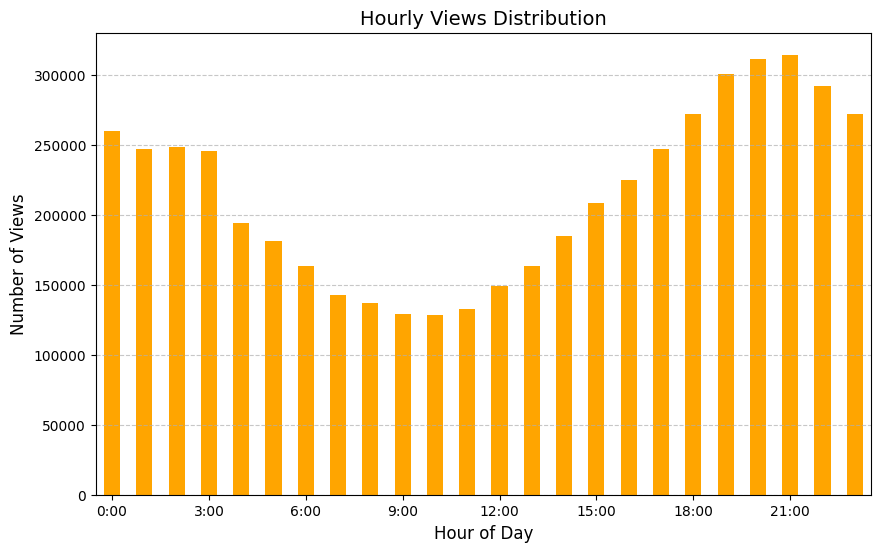

In [25]:
# 타임스탬프를 시간 단위로 변환
train_df['hour'] = pd.to_datetime(train_df['time'], unit='s').dt.hour

# 시간대별 시청 수 계산
hourly_views = train_df['hour'].value_counts().sort_index()

# 막대 플롯으로 시각화
plt.figure(figsize=(10, 6))
hourly_views.plot(kind='bar', color='orange', rot=0)
plt.title('Hourly Views Distribution', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(0, 24, 3), labels=[f"{hour}:00" for hour in range(0, 24, 3)])
plt.show()

In [26]:
item_popularity = train_df['item'].value_counts()
print(item_popularity.head(10))  # 상위 10개 인기 아이템

item
2571    19699
2959    18437
296     18202
318     18168
356     17339
4993    17237
7153    16656
5952    16387
593     15847
2858    15213
Name: count, dtype: int64


In [27]:
title_df

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [28]:
top10_item = item_popularity.index[:10]
for t in top10_item:
    print(title_df[title_df['item'] == t].values)

[[2571 'Matrix, The (1999)']]
[[2959 'Fight Club (1999)']]
[[296 'Pulp Fiction (1994)']]
[[318 'Shawshank Redemption, The (1994)']]
[[356 'Forrest Gump (1994)']]
[[4993 'Lord of the Rings: The Fellowship of the Ring, The (2001)']]
[[7153 'Lord of the Rings: The Return of the King, The (2003)']]
[[5952 'Lord of the Rings: The Two Towers, The (2002)']]
[[593 'Silence of the Lambs, The (1991)']]
[[2858 'American Beauty (1999)']]


In [32]:
overlapping_users_by_item = train_df.groupby('item')['user'].apply(list)
print(overlapping_users_by_item)
len(overlapping_users_by_item[1])

item
1         [11, 14, 58, 82, 90, 96, 99, 124, 129, 133, 13...
2         [232, 294, 370, 409, 440, 462, 466, 482, 520, ...
3         [96, 271, 427, 486, 492, 572, 775, 777, 872, 9...
4         [2242, 2709, 3708, 3948, 6318, 10303, 17127, 2...
5         [206, 572, 578, 619, 741, 872, 1068, 1163, 125...
                                ...                        
118700    [1734, 10303, 23841, 25992, 30250, 31181, 3308...
118900    [614, 3289, 8582, 8963, 9690, 10303, 11406, 16...
118997    [1644, 2423, 3020, 3289, 4222, 6390, 11232, 14...
119141    [979, 6390, 6915, 8287, 9919, 10616, 11679, 11...
119145    [828, 1339, 2544, 4222, 4967, 10514, 12461, 15...
Name: user, Length: 6807, dtype: object


12217

장르 기반 분석

In [31]:
genres_df

,item,genre
0,1,"Adventure, Animation, Children, Comedy, Fantasy"
1,2,"Adventure, Children, Fantasy"
2,3,"Comedy, Romance"
3,4,"Comedy, Drama, Romance"
4,5,Comedy
...,...,...
6802,118700,Drama
6803,118900,Drama
6804,118997,"Children, Comedy, Fantasy, Musical"
6805,119141,"Action, Comedy"


In [33]:
title_df

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)
...,...,...
6802,73106,American Pie Presents: The Book of Love (Ameri...
6803,109850,Need for Speed (2014)
6804,8605,Taxi 3 (2003)
6805,3689,Porky's II: The Next Day (1983)


In [35]:
movie_df = pd.merge(genres_df, title_df, on='item', how='left')

In [36]:
movie_df

,item,genre,title
0,1,"Adventure, Animation, Children, Comedy, Fantasy",Toy Story (1995)
1,2,"Adventure, Children, Fantasy",Jumanji (1995)
2,3,"Comedy, Romance",Grumpier Old Men (1995)
3,4,"Comedy, Drama, Romance",Waiting to Exhale (1995)
4,5,Comedy,Father of the Bride Part II (1995)
...,...,...,...
6802,118700,Drama,Selma (2014)
6803,118900,Drama,Wild (2014)
6804,118997,"Children, Comedy, Fantasy, Musical",Into the Woods (2014)
6805,119141,"Action, Comedy",The Interview (2014)


In [37]:
user_genre_preference = train_df.merge(genres_df, on='item').groupby(['user', 'genre']).size().reset_index(name='views')


In [101]:
train_genre = pd.merge(train_df, genres_df, on='item', how='left')
train_genre_with_merged = pd.merge(train_df, genres_merged_df, on='item', how='left')

In [48]:
# 장르별 시청 횟수 계산
genre_view_counts = train_genre.groupby('genre').size().reset_index(name='views')

# 결과를 시청 횟수 기준으로 내림차순 정렬
genre_view_counts = genre_view_counts.sort_values(by='views', ascending=False)

# 결과 확인
print(genre_view_counts)


          genre    views
7         Drama  2511407
4        Comedy  1719017
0        Action  1504902
15     Thriller  1435678
1     Adventure  1203283
5         Crime  1014480
13      Romance   893843
14       Sci-Fi   857851
8       Fantasy   617807
12      Mystery   493005
3      Children   397929
2     Animation   370761
10       Horror   343730
16          War   307170
11      Musical   199635
17      Western    95374
6   Documentary    90050
9     Film-Noir    70402


In [54]:
train_df[train_df['user'] == 11]

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
371,11,48738,1294796106
372,11,6291,1294796113
373,11,46578,1294796119
374,11,7153,1294796132


In [61]:
# 유저별 장르별 시청 횟수 계산
user_genre_preference = train_genre.groupby(['user', 'genre']).size().reset_index(name='views')

# 특정 유저의 장르 선호도 확인 (예: user == 11)
user_11_genres = user_genre_preference[user_genre_preference['user'] == 11].sort_values(by='views', ascending=False)
print(user_11_genres)


    user        genre  views
14    11       Sci-Fi    176
0     11       Action    167
1     11    Adventure    133
15    11     Thriller    130
7     11        Drama    112
4     11       Comedy     99
8     11      Fantasy     67
10    11       Horror     58
3     11     Children     53
2     11    Animation     50
13    11      Romance     44
5     11        Crime     33
12    11      Mystery     25
16    11          War     12
11    11      Musical     11
6     11  Documentary      5
9     11    Film-Noir      2
17    11      Western      1


감독/작가 기반 분석

In [73]:
# 감독별 시청 횟수 계산
director_views = train_df.merge(directors_df, on='item').groupby('director').size().reset_index(name='views')

# 작가별 시청 횟수 계산
writer_views = train_df.merge(writers_df, on='item').groupby('writer').size().reset_index(name='views')

# 결과 정렬
director_views = director_views.sort_values(by='views', ascending=False)
writer_views = writer_views.sort_values(by='views', ascending=False)

print(director_views.head(10))  # 감독 상위 10
print(writer_views.head(10))   # 작가 상위 10


      director   views
35   nm0000229  130434
38   nm0000233   81880
943  nm0634240   65526
101  nm0000709   63374
203  nm0001392   60938
34   nm0000217   55303
158  nm0001054   54395
16   nm0000116   53624
60   nm0000399   53385
94   nm0000631   53160
         writer  views
30    nm0000184  96994
39    nm0000233  80361
1925  nm0634240  64298
183   nm0001392  60938
2570  nm0909638  60245
296   nm0004056  60006
2188  nm0744429  58490
579   nm0101991  56955
945   nm0254645  56846
28    nm0000175  56153


In [83]:
# 1. 감독-아이템 매핑 및 시청 횟수 계산
director_item_views = train_df.merge(directors_df, on='item').groupby(['director', 'item']).size().reset_index(name='views')

# 2. 감독별로 가장 인기 있는 영화 선택
top_movies_by_director = director_item_views.loc[director_item_views.groupby('director')['views'].idxmax()]

# 3. 결과 정렬
top_movies_by_director = top_movies_by_director.sort_values(by='views', ascending=False)

# 4. 출력
print(top_movies_by_director.head(10))


       director  item  views
5392  nm0905152  2571  19699
5398  nm0905154  2571  19699
620   nm0000399  2959  18437
423   nm0000233   296  18202
1344  nm0001104   318  18168
979   nm0000709   356  17339
1625  nm0001392  4993  17237
1361  nm0001129   593  15847
2402  nm0005222  2858  15213
4511  nm0634240  4226  14726


In [85]:
# 1. 작가-아이템 매핑 및 시청 횟수 계산
writer_item_views = train_df.merge(writers_df, on='item').groupby(['writer', 'item']).size().reset_index(name='views')

# 2. 작가별로 가장 인기 있는 영화 선택
top_movies_by_writer = writer_item_views.loc[writer_item_views.groupby('writer')['views'].idxmax()]

# 3. 결과 정렬
top_movies_by_writer = top_movies_by_writer.sort_values(by='views', ascending=False)

# 4. 출력
print(top_movies_by_writer.head(10))


         writer  item  views
9952  nm0905152  2571  19699
9961  nm0905154  2571  19699
9832  nm0880243  2959  18437
7830  nm0657333  2959  18437
398   nm0000233   296  18202
950   nm0000812   296  18202
271   nm0000175   318  18168
1143  nm0001104   318  18168
8652  nm0744839   356  17339
1378  nm0001392  4993  17237


In [ ]:
# 감독별 상위 3개 인기 영화 + 작가
top_3_movies_by_director = director_item_views.groupby('director').apply(lambda x: x.nlargest(3, 'views')).reset_index(drop=True)
top_3_movies_by_writer = writer_item_views.groupby('writer').apply(lambda x: x.nlargest(3, 'views')).reset_index(drop=True)

/tmp/ipykernel_697062/1784986605.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_movies_by_director = director_item_views.groupby('director').apply(lambda x: x.nlargest(3, 'views')).reset_index(drop=True)
/tmp/ipykernel_697062/1784986605.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_movies_by_writer = writer_item_views.groupby('writer').apply(lambda x: x.nlargest(3, 'views')).reset_ind

In [87]:
top_3_movies_by_director

,director,item,views
0,nm0000005,1237,1383
1,nm0000005,5147,949
2,nm0000005,7327,751
3,nm0000019,1251,905
4,nm0000019,8154,759
...,...,...,...
3531,nm2879822,58376,251
3532,nm2879822,65225,138
3533,nm2879822,84273,82
3534,nm9054338,2394,1015


In [90]:
top_3_movies_by_writer

,writer,item,views
0,nm0000005,1237,1383
1,nm0000005,5147,949
2,nm0000005,7327,751
3,nm0000019,1251,905
4,nm0000019,8154,759
...,...,...,...
7600,nm5371819,27397,332
7601,nm5927607,2987,5118
7602,nm5927607,33463,53
7603,nm5927608,2987,5118


In [ ]:
# 유저-감독 상호작용 계산
user_director_preference = train_genre.merge(directors_df, on='item').groupby(['user', 'director']).size().reset_index(name='views')
user_writer_preference = train_genre.merge(writers_df, on='item').groupby(['user', 'writer']).size().reset_index(name='views')

# 특정 유저(예: user=11)의 선호 감독 확인
user_11_directors = user_director_preference[user_director_preference['user'] == 11]
user_11_writers = user_writer_preference[user_writer_preference['user'] == 11]

print(user_11_directors.sort_values(by='views', ascending=False))
print(user_11_writers.sort_values(by='views', ascending=False))

     user   director  views
8      11  nm0000229     31
18     11  nm0000386     21
14     11  nm0000318     21
31     11  nm0000709     20
174    11  nm0594503     17
..    ...        ...    ...
39     11  nm0001081      1
57     11  nm0001469      1
50     11  nm0001348      1
203    11  nm0752328      1
221    11  nm0863387      1

[257 rows x 3 columns]
     user     writer  views
360    11  nm0639321     32
405    11  nm0744429     32
182    11  nm0254645     29
36     11  nm0001140     27
431    11  nm0795953     24
..    ...        ...    ...
33     11  nm0001081      1
40     11  nm0001348      1
50     11  nm0001705      1
535    11  nm1034122      1
541    11  nm1152581      1

[577 rows x 3 columns]


연도별 분석

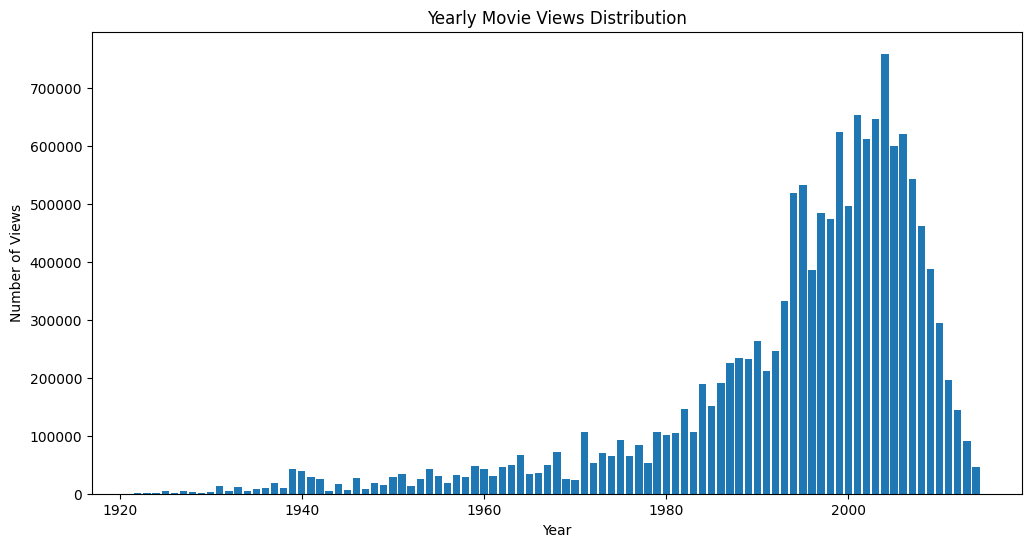

In [ ]:
# 연도별 시청 횟수 계산
year_view_counts = train_genre.merge(years_df, on='item').groupby('year').size().reset_index(name='views')

# 연도별 시청 횟수 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(year_view_counts['year'], year_view_counts['views'])
plt.title('Yearly Movie Views Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Views')
plt.show()

In [ ]:
# 유저-연도 상호작용 계산
user_year_preference = train_genre.merge(years_df, on='item').groupby(['user', 'year']).size().reset_index(name='views')

# 특정 유저(예: user=11)의 선호 연도 확인
user_11_years = user_year_preference[user_year_preference['user'] == 11]
print(user_11_years.sort_values(by='views', ascending=False))

    user  year  views
35    11  2004    112
33    11  2002     77
38    11  2007     75
34    11  2003     64
36    11  2005     64
30    11  1999     61
37    11  2006     60
39    11  2008     59
32    11  2001     54
26    11  1995     53
31    11  2000     47
27    11  1996     47
28    11  1997     44
25    11  1994     41
29    11  1998     38
21    11  1990     33
18    11  1987     26
24    11  1993     26
40    11  2009     21
23    11  1992     18
16    11  1985     18
22    11  1991     15
20    11  1989     14
15    11  1984     13
12    11  1981     13
13    11  1982     11
17    11  1986     10
14    11  1983      9
2     11  1951      8
19    11  1988      8
10    11  1979      5
11    11  1980      5
8     11  1975      5
4     11  1964      4
7     11  1971      4
0     11  1941      4
5     11  1968      3
1     11  1942      3
9     11  1977      3
6     11  1970      2
3     11  1960      1


In [1]:
1

1

감독-장르 조합 분석

In [97]:
director_genre_counts

,director,genre,views
0,nm0000005,Comedy,306
1,nm0000005,Crime,340
2,nm0000005,Drama,6054
3,nm0000005,Fantasy,601
4,nm0000005,Horror,155
...,...,...,...
6647,nm2879822,Documentary,471
6648,nm2879822,War,251
6649,nm9054338,Animation,1380
6650,nm9054338,Comedy,365


In [98]:
# 감독-장르 상호작용 계산
director_genre_counts = train_genre.merge(directors_df, on='item').groupby(['director', 'genre']).size().reset_index(name='views')

# 특정 감독(예: 감독 A)의 장르 확인
director_a_genres = director_genre_counts[director_genre_counts['director'] == 'nm0000005']
print(director_a_genres.sort_values(by='views', ascending=False))

    director    genre  views
2  nm0000005    Drama   6054
3  nm0000005  Fantasy    601
6  nm0000005  Mystery    502
7  nm0000005  Romance    397
1  nm0000005    Crime    340
0  nm0000005   Comedy    306
4  nm0000005   Horror    155
8  nm0000005      War    101
5  nm0000005  Musical     99


In [103]:
# 감독-장르 상호작용 계산
director_genre_counts = train_genre_with_merged.merge(directors_df, on='item').groupby(['director', 'genre']).size().reset_index(name='views')

# 특정 감독(예: 감독 A)의 장르 확인
director_a_genres = director_genre_counts[director_genre_counts['director'] == 'nm0000005']
print(director_a_genres.sort_values(by='views', ascending=False))

    director                              genre  views
3  nm0000005                              Drama   4865
4  nm0000005            Drama, Fantasy, Mystery    502
2  nm0000005                       Crime, Drama    340
1  nm0000005                    Comedy, Romance    207
5  nm0000005                      Drama, Horror    155
7  nm0000005                         Drama, War    101
0  nm0000005  Comedy, Fantasy, Musical, Romance     99
6  nm0000005                     Drama, Romance     91
